In [1]:
import tensorflow as tf
from tensorflow.keras import layers as L
from tensorflow.keras import Model
from sklearn.utils import validation
from tensorflow.python.keras.engine import training
import random
import argparse
import warnings
from logging import error
import tensorflow as tf
import librosa
import os
import numpy as np
from SpeechModel import SpeechModel

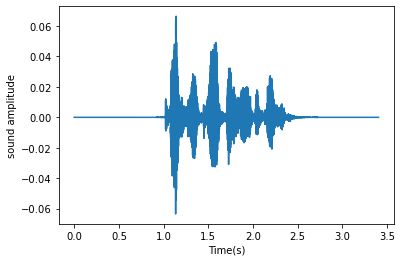

In [17]:
import numpy as np
import matplotlib.pyplot as plt 
from glob import glob
import librosa as lr
#torchaudio

audio='test_data/surprised_data/03-01-08-01-01-01-01' # change with the name of your audio
y, sr = lr.load('./{}.wav'.format(audio)) #you just need to make sure your audio is in the same folder in which you are coding or else you can change the path as per your requirement
time = np.arange(0,len(y))/sr
fig, ax = plt.subplots()
ax.plot(time,y)
ax.set(xlabel='Time(s)',ylabel='sound amplitude')
plt.show()



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
///
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


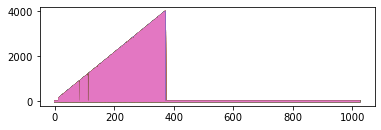

In [4]:
### pitch

from IPython.display import Audio

pitches, magnitudes = lr.piptrack(y=y, sr=sr)
print(pitches)
print('///')
print(magnitudes)
plt.subplot(212)
plt.plot(pitches)
plt.show()


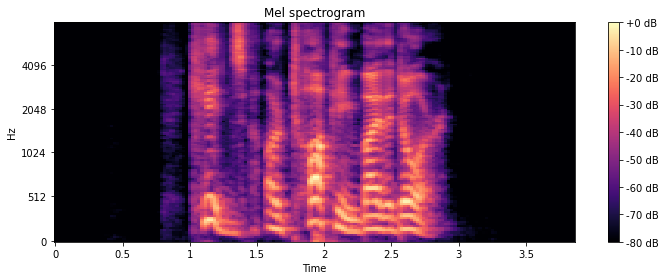

In [49]:
### melspectogram
from glob import glob
import librosa as lr
import librosa.display

lr.feature.melspectrogram(y=y, sr=sr)

D = np.abs(lr.stft(y))**2
S = lr.feature.melspectrogram(S=D)
S = lr.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
plt.figure(figsize=(10, 4))
lr.display.specshow(lr.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()


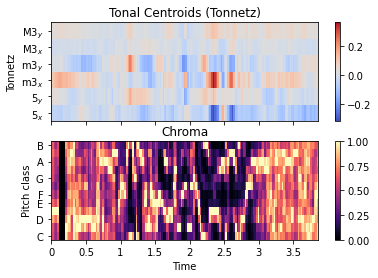

In [50]:
# tonnetz

tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(tonnetz,
                                y_axis='tonnetz', x_axis='time', ax=ax[0])
ax[0].set(title='Tonal Centroids (Tonnetz)')
ax[0].label_outer()

# chromogram
img2 = librosa.display.specshow(librosa.feature.chroma_stft(y=y, sr=sr),
                                y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='Chroma')
fig.colorbar(img1, ax=[ax[0]])
fig.colorbar(img2, ax=[ax[1]])

[Text(0, 0.5, 'Frequency bands'), Text(0.5, 1.0, 'Spectral contrast')]

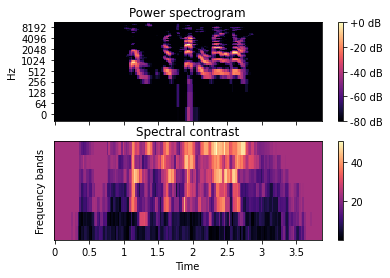

In [51]:
# power

fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                 ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img1, ax=[ax[0]], format='%+2.0f dB')
ax[0].set(title='Power spectrogram')
ax[0].label_outer()

# spectral contrast 
img2 = librosa.display.specshow(librosa.feature.spectral_contrast(S=S, sr=sr), x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Frequency bands', title='Spectral contrast')


Text(0.5, 1.0, 'MFCC')

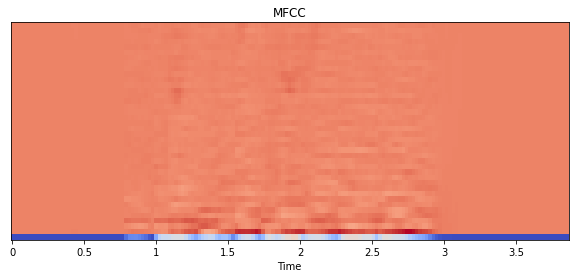

In [52]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
plt.figure(figsize=(10, 4))
img = librosa.display.specshow(mfccs, x_axis='time')
plt.title( "MFCC")

In [18]:
import sys
print(sys.version)

3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
